<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Владислав, рад приветствовать тебя! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха)

# Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

## Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 
Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
import joblib

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

## Изучение данных

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.sample(15)

,calls,minutes,messages,mb_used,is_ultra
2232,93.0,730.44,0.0,20294.90,1
2018,62.0,468.96,10.0,28630.32,0
2913,84.0,588.71,67.0,22456.40,0
1442,77.0,587.54,56.0,11104.28,0
489,53.0,341.14,64.0,14442.64,0
122,55.0,443.09,49.0,17435.97,0
67,33.0,238.70,24.0,9308.63,1
2829,42.0,275.13,42.0,19131.65,1
1223,93.0,671.14,145.0,21441.95,1
3185,12.0,53.14,28.0,11795.89,0


В датасете 3213 записи, без пропусков. Значения выглядят нормальными, так что можно приступать к разделению данных для тренировки, валидации и тестирования.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ОК, но маловато будет))))<br>
    
На практике, в подобных проектах, на этом шаге важно поисследовать данные для моделей<br>
Например, посмотерть гистограсммы (что с нормальностью/ненормальностью), боксплоты (есть ли выбросы).
<br> Можно оценить корреляцию факторов друг с другом и с целевой переменной.<br>
такие шаги - дают несколько идей сразу для моделей!!!<br>
Например, если есть мультиколлинеаорность факторов (когда факторы модели имеют сильную связь друг с другом), то сразу можно один из факторов исключить.<br>

Обычныя алгоритм такой:<br>
1) анализ аномалий (предобработка уже была)<br>
2) анализ пропусков (предобработка уже была)<br>
3) проверка дубликатов(предобработка была уже)<br>
4) Анализ факторов<br>
- собранные в колличнесвтенной шкале (например call): нормальность, корреляции (только для колличесвтенных данных) + графики: гистограмма и скатерплоты. Если удастся сделать это ещё и по группам - будет высший пилотаж<br>
- собранные в виде категорий, групп (например is_ultra): <br>
    
    
Есть три типа анализа данных, взависимости от типа шкалы данных:<br>
1) колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
2) колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
3) номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>

<font color='red'>
Попробуй сделать некоторые аналитические "раскопки")))<br>

### Анализ факторов

In [11]:
df_smart = df[df['is_ultra'] == 0]
df_ultra = df[df['is_ultra'] == 1]

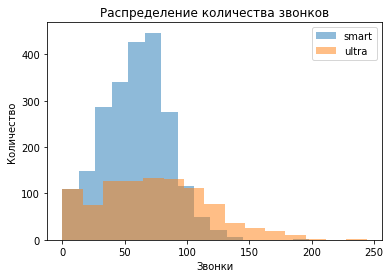

In [12]:
fig, ax = plt.subplots()
ax.hist(df_smart['calls'], bins=15, alpha=0.5, label='smart')
ax.hist(df_ultra['calls'], bins=15, alpha=0.5, label='ultra')
ax.set_title('Распределение количества звонков')
plt.xlabel('Звонки')
plt.ylabel('Количество')
plt.legend()
plt.show()

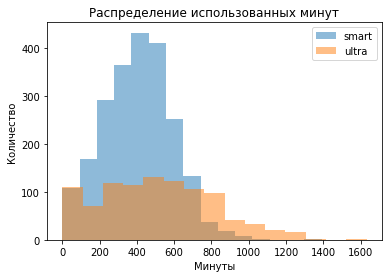

In [13]:
fig, ax = plt.subplots()
ax.hist(df_smart['minutes'], bins=15, alpha=0.5, label='smart')
ax.hist(df_ultra['minutes'], bins=15, alpha=0.5, label='ultra')
ax.set_title('Распределение использованных минут')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.legend()
plt.show()

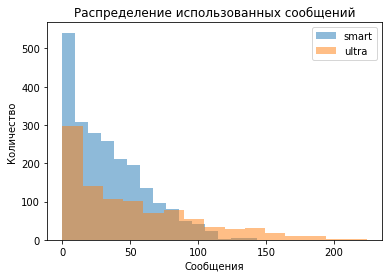

In [14]:
fig, ax = plt.subplots()
ax.hist(df_smart['messages'], bins=15, alpha=0.5, label='smart')
ax.hist(df_ultra['messages'], bins=15, alpha=0.5, label='ultra')
ax.set_title('Распределение использованных сообщений')
plt.xlabel('Сообщения')
plt.ylabel('Количество')
plt.legend()
plt.show()

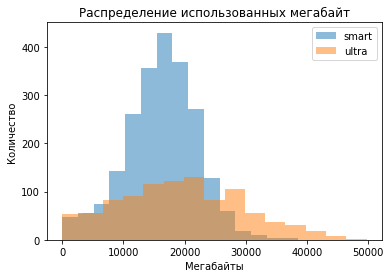

In [15]:
fig, ax = plt.subplots()
ax.hist(df_smart['mb_used'], bins=15, alpha=0.5, label='smart')
ax.hist(df_ultra['mb_used'], bins=15, alpha=0.5, label='ultra')
ax.set_title('Распределение использованных мегабайт')
plt.xlabel('Мегабайты')
plt.ylabel('Количество')
plt.legend()
plt.show()

Построив графики мы можем увидеть что все наши распределения стремятся так или иначе к нормальному. Так же можно увидеть выбросы в данных как среди пользователей тарифа смарт, так и среди пользователей тарифа ультра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f191cd92e50>,
      dtype=object)

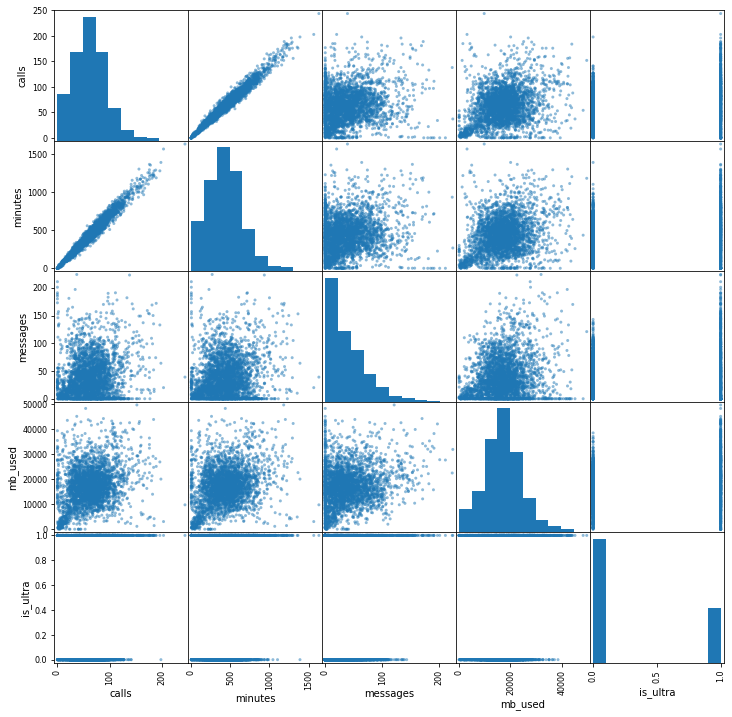

In [18]:
pd.plotting.scatter_matrix(df, figsize=(12, 12))

scatermatrix показала нам, что между использованными минутами и количеством звонков сильная положительная корреляция, значит они мультиколинеарны и в дальнейшем один из признаков можно исключить.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Здорово) ещё правильнее будет, если подобный график и расчёты строить по тарифам отдельно. Сейчас по всеё выборке в целом. А может в одном тарифе сильна корреляция, а вдругом - нет ( в нашем проекте такоего нет))) но практике луше расширчть такой анализ именно на группы)

## Разделение данных на выборки

Для обучения моделей нам не нужен такой признак как количство звонков, так как в тарифах считается количество использованных минут, а не количество звонков.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
ОК, понятно)<br>
Но может фактор сильный? (на я согласен с твоим выводом) Просто должна быть более сильная аргументация. как раз из п.1 будет график скатерплот и посчитанная корреляция. И как раз будет видно, что минуты и звони=ки имеют сильную корреляцию,т.е. мультиколлинеарны. Поэтому один их них можно исключить. И это как раз звонки))

In [49]:
df.drop('calls', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 4 columns):
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(3), int64(1)
memory usage: 100.6 KB


In [50]:
features = df.drop('is_ultra', axis=1)
targets = df['is_ultra']

Поделим выборку на 60% для обучения и по 20% для валидации и тестирования.

In [51]:
features_train, features_val_test, target_train, target_val_test = train_test_split(features, targets, test_size=0.4, stratify=targets, random_state=123)

features_val, features_test, target_val, target_test = train_test_split(features_val_test, target_val_test, test_size=0.5, stratify=target_val_test, random_state=123)

## Исследование разных моделей

### Исследование модели дерева решений

In [52]:
for deep in range(1,10):
    tree_model = DecisionTreeClassifier(max_depth=deep, random_state=123)
    tree_model.fit(features_train, target_train)
    
    prediction = tree_model.predict(features_val)
    
    train_score = tree_model.score(features_train, target_train)
    score = tree_model.score(features_val, target_val)
    
    print('Deep: {}'.format(deep))
    print('Decision Tree train: {}'.format(train_score))
    print('Decision Tree valid: {}'.format(score))
    print()

Deep: 1
Decision Tree train: 0.754149377593361
Decision Tree valid: 0.7465007776049767

Deep: 2
Decision Tree train: 0.7821576763485477
Decision Tree valid: 0.7822706065318819

Deep: 3
Decision Tree train: 0.7971991701244814
Decision Tree valid: 0.7947122861586314

Deep: 4
Decision Tree train: 0.8091286307053942
Decision Tree valid: 0.7838258164852255

Deep: 5
Decision Tree train: 0.8127593360995851
Decision Tree valid: 0.7822706065318819

Deep: 6
Decision Tree train: 0.8195020746887967
Decision Tree valid: 0.7838258164852255

Deep: 7
Decision Tree train: 0.8283195020746889
Decision Tree valid: 0.7900466562986003

Deep: 8
Decision Tree train: 0.841804979253112
Decision Tree valid: 0.7853810264385692

Deep: 9
Decision Tree train: 0.8521784232365145
Decision Tree valid: 0.7838258164852255



In [53]:
tree_param_grid = {'max_depth': [deep for deep in range(1, 10)]}
tree_gs = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid=tree_param_grid)

tree_gs.fit(features_train, target_train)

print(tree_gs.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 4}


In [54]:
tree_predict = tree_gs.predict(features_val_test)

tree_train_score = tree_gs.score(features_train, target_train)
tree_score = tree_gs.score(features_val, target_val)
print('Decision Tree train: {}'.format(tree_train_score))
print('Decision Tree valid: {}'.format(tree_score))

Decision Tree train: 0.8091286307053942
Decision Tree valid: 0.7838258164852255


При ручном переборе максимальной глубины дерева, мы можем заметить, что чем глубже дерево, тем метрики этой модели лучше, но это так же это может означать что у модели происходит переобучение. Поэтому мы можем использовать GridSearchCV для выбора лучших гиперпараметров для нашей модели. Для дальнейшего выбора модели лучше использовать GridSearchCV.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
принято)

### Исследование модели случайного леса

Так как модель случайного леса состоит из множества деревьев решений мы будем менять параметр max_depth, как в прошлый раз, а так же n_estimators.

In [ ]:
forest_param_grid = {'max_depth': [deep for deep in range(2, 16, 2)],
                    'n_estimators': [50, 100, 150]}
forest_gs = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=forest_param_grid)
forest_gs.fit(features_train, target_train)

print(forest_gs.best_params_)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
forest_predict = forest_gs.predict(features_val)

forest_train_score = forest_gs.score(features_train, target_train)
forest_score = forest_gs.score(features_val, target_val)

print('Random Forest train: {}'.format(forest_train_score))
print('Random Forest valid: {}'.format(forest_score))

Хоть мы и передали гиперпараметры для глубины от 2 до 16 с шагом 2 значения, лучше всего для модели подошло значение 6, а количество деревьев так и вовсе 100 достаточно, так что больше - не значит лучше. Хоть этот метод и медленее, но это модель точнее, чем просто дерево.

### Исследование модели логистической регрессии

In [ ]:
logistic_param_grid = {'C': [1.0, 0.5, 0.1]}
logistic_gs = GridSearchCV(LogisticRegression(random_state=123), param_grid=logistic_param_grid)
logistic_gs.fit(features_train, target_train)

print(logistic_gs.best_params_)

In [ ]:
logistic_predict = logistic_gs.predict(features_val)

logistic_train_score = logistic_gs.score(features_train, target_train)
logistic_score = logistic_gs.score(features_val, target_val)

print('Logistic Regression train: {}'.format(logistic_train_score))
print('Logistic Regression valid: {}'.format(logistic_score))

При разных значения регуляризации, лучшим оказалось значение 1. Это модель гораздо быстрее остальных, но она получилась наименее точной.

**Вывод:** Так как модель дерева решений это частный случай модели случайного леса, мы можем сразу её отбросить, так как несколько деревьев лучше одного. Модель логистической регресии мы отбрасываем из-за недостаточной точности, хоть она и быстрее остальных. Таким образом остается модель случайного леса с максимальной глубинной дерева 10 и 50 деревьев.

## Проверка качества модели на тестовой выборке

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=123)


In [ ]:
forest_model = RandomForestClassifier(max_depth = 6, n_estimators= 100, random_state=123)
forest_model.fit(X_train, y_train)
prediction = forest_model.predict(X_test)

In [ ]:
forest_test_score = forest_gs.score(X_test, y_test)
print('Random Forest valid: {}'.format(forest_test_score))
print(classification_report(y_test, prediction))

Мы создали модель случайного леса с нужными нам гиперпараметрами, обучили её и получили accurancy 79%. Так же видно, что точность в разных классах сбалансирована и модель не отдает предпочтение какому-то конкректному классу. 

## Попытка проверки модели на вменяемость

In [ ]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 123) 
dclf.fit(X_train, y_train)

print('Dummy score: {}'.format(dclf.score(X_test, y_test)))
print('Random Forest score: {}'.format(forest_test_score))

Как видно из accurency наша модель всё же предсказывает лучше данные, чем наша Dummy модель, поэтому нашу модель можно считать вменяемой. 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Верно, <br>
Под адекватностью можно понимать ещё и так: наша модель лучше для бизнеса, чем вообще без модели? <br>
Т.е. СТоит вкладываться в DS или можно позвать "деда Васю" и он так, на глаз...<br>
Когда модель прогнозирует колличественный параметр, например продажи в штуках, то модель сравнивают со средними продажами. Типа в среднем у нас продажи столько-то единиц товара будет завтра. Ну и сравнивают с предсказанием модели.<br>
Когда модель предсказывает количесвто угадывания, как в данном проекте, то считают просто количество по выборке<br>

## Вывод

В ходе проекта мы рассмотрели возможности разных модели, а так же выяснили, что разные гиперпараметры по разному влияют на точность предсказывания той или иной модели. Испробовав разные модели, а именно дерево решений, случайный лес и логистическую регрессию - моделью с самым большим accuracy оказалася случайный лес с глубиной дерева 6 и 100 деревьев. Эти гиперпарметры помогли нам достичь точности в 79% на тестовой выборке. Так же мы убедились, что наша модель вменяема сравнив accuracy нашей модели с Dummy моделью.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Владислав,  привет)<br>
Спасибо, что отреагировал на мои комментарии<br>
Проект теперь приобрёл другой оттенок)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Владислав,  уверенная работа)<br>
Всё логично, последовательно, точно и с выводами - это важно.<br>
Модельная часть у тебя получилась лаконичной, но дельной, и это здорово.<br>
<br>
На тестовом блоке, ты объединяешь расширяешь обучающую выборку - хорошее решение)
    
Ещё момент:<br>  
Наверное ты в курсе, просто хочу напомнить: F1 и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
<font color='red'>    
Если вернуться к проекту:<br>
Попробуй дополнить ещё раздел анаитики факторов модели.<br>
Постарался описать проблематику. <br>
Это ни как не повляет на результат этой модели. У тебя здесь всё ок. А вот раздел анализа данных будет более полным))<br>
В любом моделировании, это пункт очень важен)<br>
<font color='green'>    
<br>СПАСИБО)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!